<a href="https://colab.research.google.com/github/kharinoctavian/Streamlit/blob/master/NAIVE%2CBAGGING%2CSMOTENC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv(r'DATA DELAY 14NOV.csv')
data.head

<bound method NDFrame.head of     JENIS KAPAL   BD  INTERNAL DELAY  ...  PALKA  DERMAGA  DELAY
0        DIRECT   54            0.95  ...      8        2      0
1        DIRECT  101            1.78  ...      6        2      0
2        DIRECT    0            0.58  ...     27        3      0
3        DIRECT  130            5.50  ...      6        2      0
4        DIRECT   55            4.53  ...     40        4      0
..          ...  ...             ...  ...    ...      ...    ...
119      DIRECT    0            0.57  ...      8        3      0
120      DIRECT   41            0.77  ...     11        2      0
121      FEEDER  164            3.18  ...     29        4      0
122      DIRECT   47            0.85  ...      9        1      0
123      DIRECT   23            0.38  ...     13        3      0

[124 rows x 8 columns]>

In [ ]:
data['JENIS KAPAL'] = np.where(data['JENIS KAPAL'] == "DIRECT", 1, 0)
data.head()

NameError: ignored

In [ ]:
arr = data.values
X = arr[:, 0:6]
Y = arr[:, 7]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=0)

In [ ]:
#NAIVE TANPA BAGGING
from sklearn.metrics import accuracy_score
model=GaussianNB()
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.6052631578947368

In [ ]:
#BAGGING
h=BaggingClassifier(GaussianNB(),n_estimators = 10, max_features = 0.5,random_state = 0)

In [ ]:
#AKURASI BAGGING
h.fit(X_train,Y_train)
Y_pred=h.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.6842105263157895

In [ ]:
data1=pd.read_csv(r'DATA DELAY 14NOVcategorik.csv')
data1.head

<bound method NDFrame.head of     JENIS KAPAL  DERMAGA   BD  ...  SHIFTING YARD  PALKA  DELAY
0        DIRECT        2   54  ...             30      8      0
1        DIRECT        2  101  ...             10      6      0
2        DIRECT        3    0  ...             61     27      0
3        DIRECT        2  130  ...             18      6      0
4        DIRECT        4   55  ...            146     40      0
..          ...      ...  ...  ...            ...    ...    ...
119      DIRECT        3    0  ...            124      8      0
120      DIRECT        2   41  ...            117     11      0
121      FEEDER        4  164  ...            165     29      0
122      DIRECT        1   47  ...            160      9      0
123      DIRECT        3   23  ...            132     13      0

[124 rows x 8 columns]>

In [ ]:
data1['JENIS KAPAL'] = np.where(data1['JENIS KAPAL'] == "DIRECT", 1, 0)
data1.head()

,JENIS KAPAL,DERMAGA,BD,INTERNAL DELAY,SHIFTING KAPAL,SHIFTING YARD,PALKA,DELAY
0,1,2,54,0.95,3,30,8,0
1,1,2,101,1.78,2,10,6,0
2,1,3,0,0.58,2,61,27,0
3,1,2,130,5.50,1,18,6,0
4,1,4,55,4.53,4,146,40,0


In [ ]:
arr = data1.values
X = arr[:, 0:6]
Y = arr[:, 7]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=0)

In [ ]:
#NAIVE TANPA BAGGING
from sklearn.metrics import accuracy_score
model=GaussianNB()
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[23  2]
 [11  2]]


0.6578947368421053

In [ ]:
#BAGGING
h=BaggingClassifier(GaussianNB(),n_estimators = 10, max_features = 0.5,random_state = 0)

In [ ]:
#AKURASI BAGGING
h.fit(X_train,Y_train)
Y_pred=h.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[24  1]
 [11  2]]


0.6842105263157895

In [ ]:
#SMOTENC
from imblearn.over_sampling import SMOTENC
data1_index=[0, 1]
data1_index
smote_nc = SMOTENC(categorical_features=data1_index, random_state=0)
X_resampled, Y_resampled = smote_nc.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
XS_train,XS_test,YS_train,YS_test=train_test_split(X_resampled, Y_resampled,test_size=.3,random_state=0)

In [ ]:
#SMOTE NC NAIVE
from sklearn.metrics import accuracy_score
model=GaussianNB()
model.fit(XS_train, YS_train)
YS_pred=model.predict(XS_test)
cm=confusion_matrix(YS_test,YS_pred)
print(cm)
accuracy_score(YS_test, YS_pred)

[[23  6]
 [16  9]]


0.5925925925925926

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions=log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,predictions)
print (cm)
accuracy_score(Y_test, predictions)

[[24  1]
 [11  2]]


0.6842105263157895

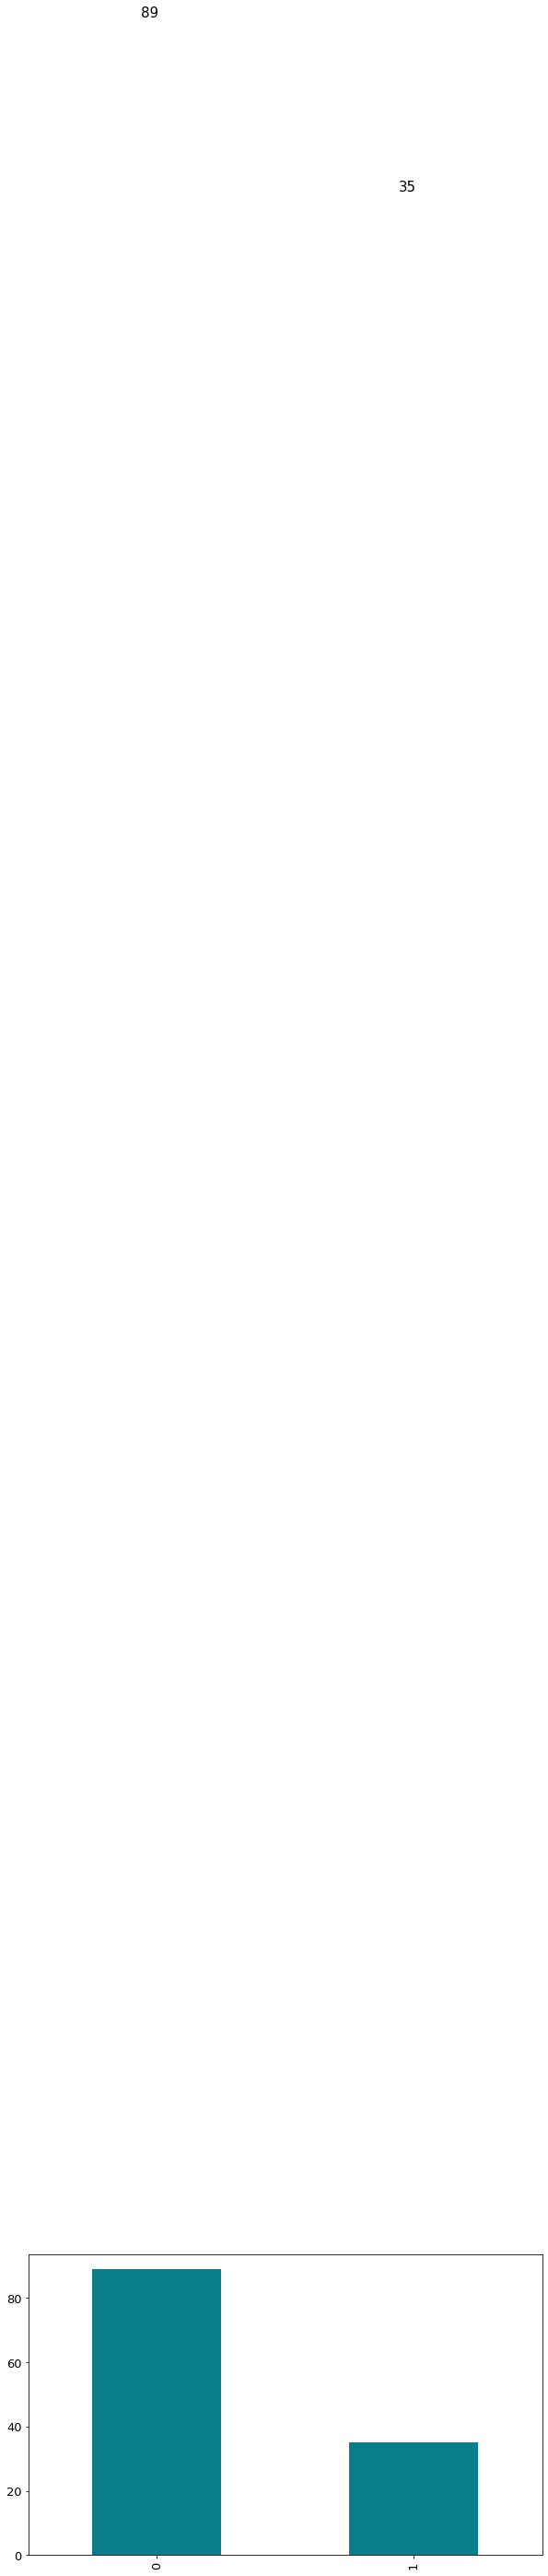

In [ ]:
ax = data1['DELAY'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in data1.columns if data1[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(data1[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    data1[col] = scaled[col]

data1.head()

,JENIS KAPAL,DERMAGA,BD,INTERNAL DELAY,SHIFTING KAPAL,SHIFTING YARD,PALKA,DELAY
0,1,0.333333,0.069677,0.059116,0.027778,0.065534,0.105263,0
1,1,0.333333,0.130323,0.110765,0.013889,0.016990,0.052632,0
2,1,0.666667,0.000000,0.036092,0.013889,0.140777,0.605263,0
3,1,0.333333,0.167742,0.342253,0.000000,0.036408,0.052632,0
4,1,1.000000,0.070968,0.281892,0.041667,0.347087,0.947368,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data1.drop('DELAY', axis=1)
y = data1['DELAY']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


% Positive class in Train = 31.4
% Positive class in Test  = 21.05


In [ ]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
cm

Accuracy = 0.76
Recall = 0.38



array([[26,  4],
       [ 5,  3]])

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts * 100

Shape of X before SMOTE: (124, 7)
Shape of X after SMOTE: (178, 7)

Balance of positive and negative classes (%):


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


AttributeError: ignored

In [ ]:
#RANDOM FOREST WITH SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


Accuracy = 0.80
Recall = 0.80



NameError: ignored

In [ ]:
from imblearn.over_sampling import SMOTENC
data1_index=[0, 1]
data1_index
smote_nc = SMOTENC(categorical_features=data1_index, random_state=0)
X_resampled, Y_resampled = smote_nc.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#RANDOM FOREST WITH SMOTENC

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
cm


Accuracy = 0.73
Recall = 0.65



array([[20,  5],
       [ 7, 13]])

In [ ]:
#NBC


from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model=GaussianNB()
model.fit(X_train, y_train)
preds=model.predict(X_test)
accuracy_score(y_test, preds)


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
cm

Accuracy = 0.69
Recall = 0.45



array([[22,  3],
       [11,  9]])

In [ ]:
#SMOTE NBC

Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = GaussianNB()
model.fit(Xsm_train, ysm_train)
preds = model.predict(Xsm_test)

print(f'Accuracy = {accuracy_score(ysm_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(ysm_test, preds)
cm


Accuracy = 0.69
Recall = 0.45



array([[22,  3],
       [11,  9]])